In [179]:
from skimage.io import imread, imshow
from skimage.transform import resize, rescale 
import numpy as np
import matplotlib

/home/pavel/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


(9656, 3741)


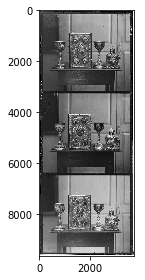

In [188]:
imPath = '/home/pavel/MyDocs/ComputerVision/15_input/img.png'
img = imread(imPath, plugin ='matplotlib')
imshow(img)
print(img.shape)

In [199]:
def align(img, grCoord):
    height = img.shape[0]//3
    length = img.shape[1]
    img1 = img[0:height, 0:length]
    img2 = img[height:2*height, 0:length]
    img3 = img[2*height:3*height, 0:length]
    img1 = img1[int(0.05*height):int(0.95*height), int(0.05*length):int(0.95*length)]
    img2 = img2[int(0.05*height):int(0.95*height), int(0.05*length):int(0.95*length)]
    img3 = img3[int(0.05*height):int(0.95*height), int(0.05*length):int(0.95*length)]

    imgCopy1 = img1  
    imgCopy2 = img2
    imgCopy3 = img3
    images1 = [imgCopy1]
    images2 = [imgCopy2]
    images3 = [imgCopy3]
    
    while imgCopy1.shape[0] > 300 or imgCopy1.shape[1] > 300:
        imgCopy1 = resize(imgCopy1, (imgCopy1.shape[0]//2, imgCopy1.shape[1]//2))
        imgCopy2 = resize(imgCopy2, (imgCopy2.shape[0]//2, imgCopy2.shape[1]//2))
        imgCopy3 = resize(imgCopy3, (imgCopy3.shape[0]//2, imgCopy3.shape[1]//2))
        images1.append(imgCopy1)
        images2.append(imgCopy2)
        images3.append(imgCopy3)
        
    red = superposition(imgCopy2, imgCopy3, 0, 0, 15) 
    blue = superposition(imgCopy2, imgCopy1, 0, 0, 15)
    imgNum = len(images1)
    
    for i in range(imgNum - 1):
        xRed = red[0]
        yRed = red[1]
        xBlue = blue[0]
        yBlue = blue[1]
        red = superposition(images2[imgNum - i - 2], images3[imgNum - i - 2], 2*xRed, 2*yRed, 2)  
        blue = superposition(images2[imgNum - i - 2], images1[imgNum - i - 2], 2*xBlue, 2*yBlue, 2)
    
    xSize = img2.shape[0] + min(0, red[0], blue[0]) - max(0, red[0], blue[0])
    ySize = img2.shape[1] + min(0, red[1], blue[1]) - max(0, red[1], blue[1])

    imgAns = np.zeros([xSize, ySize, 3], dtype=np.uint8)
    imgAns[:, :, 1] = 255 * img2[max(0, red[0], blue[0]):img2.shape[0] + min(0, red[0], blue[0]), max(0, red[1], blue[1]):img2.shape[1] + min(0, red[1], blue[1])]
    imgAns[:, :, 0] = 255 * img3[max(0, red[0], blue[0]) - red[0]:img2.shape[0] + min(0, red[0], blue[0]) - red[0], max(0, red[1], blue[1]) - red[1]:img2.shape[1] + min(0, red[1], blue[1]) - red[1]]
    imgAns[:, :, 2] = 255 * img1[max(0, red[0], blue[0]) - blue[0]:img2.shape[0] + min(0, red[0], blue[0]) - blue[0], max(0, red[1], blue[1]) - blue[1]:img2.shape[1] + min(0, red[1], blue[1]) - blue[1]]
    
    g_row = grCoord[0]
    g_col = grCoord[1]
    return imgAns, (g_row - height - blue[0], g_col - blue[1]), (g_row + height - red[0], g_col - red[1])

def superposition(img1, img2, xStart, yStart, acc): 
    xShiftAns = 0
    yShiftAns = 0
    xSize = min(img1.shape[0], img2.shape[0])
    ySize = min(img1.shape[1], img2.shape[1])
    metricAns = float("inf")
    for xShift in range(xStart - acc, xStart + acc + 1):
        for yShift in range(yStart - acc, yStart + acc + 1):
            metricCur = 0
            img1Cropped = img1[max(0, xShift):min(xSize, xSize + xShift), max(0, yShift):min(ySize, ySize + yShift)]
            img2Cropped = img2[max(0, -xShift):min(xSize, xSize - xShift), max(0, -yShift):min(ySize, ySize - yShift)]
            metricCur = np.sum((img1Cropped - img2Cropped) * (img1Cropped - img2Cropped))
            if metricCur < metricAns:
                xShiftAns = xShift
                yShiftAns = yShift
                metricAns = metricCur
    return xShiftAns, yShiftAns

/home/pavel/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/pavel/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


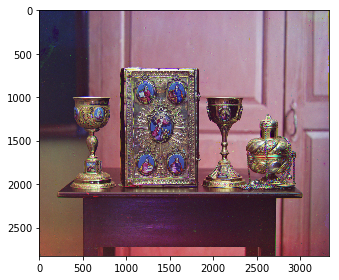

In [202]:
imshow(align(img, (0, 0))[0])